<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_OB/blob/%ED%95%84%EC%82%AC/Chap09_Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter9. 비지도 학습

* 군집 : 비슷한 샘플을 클러스터로 모음. 군집은 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등에 사용 가능함
* 이상치 탐지 : '정상' 데이터가 어떻게 보이는지 학습함. 그다음 비정상 샘플을 감지하는데 사용함. ex) 제조 라인에서 결함 제품을 감지하거나 시계열 데이터에서 새로운 트렌드를 찾음
* 밀도 추정 : 데이터셋 생성 확률 과정의 확률 밀도 함수를 추정함. 밀도 추정은 이상치 탐지에 널리 사용됨. 밀도가 매우 낮은 영역에 놓인 샘플이 이상치일 가능성이 높으며 데이터 분석과 시각화에도 유용함.

##9.1. 군집

군집 : 비슷한 샘플을 구별해 하나의 클러스터 또는 비슷한 샘플의 그룹으로 할당하는 작업

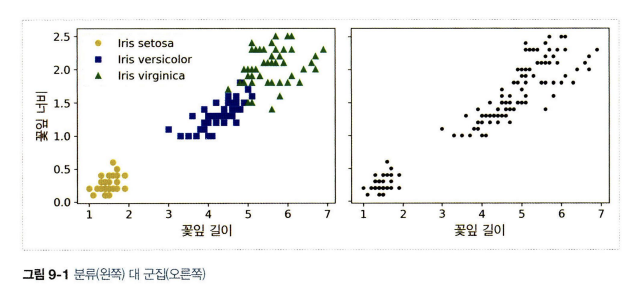

왼쪽 : 레이블이 되어있는 데이터 -> 로지스틱 회귀, SVM, RF 분류기 같은 분류 알고리즘이 잘 맞음

오른쪽 : 동일 데이터셋이지만 레이블이 없음 -> 분류 알고리즘 사용할 수 없고, 군집 알고리즘이 필요함

[군집 분류가 사용되는 애플리케이션]
* 고객 분류 : 고객을 구매 이력이나 웹사이트 내 행동 등을 기반으로 클러스터로 모을 수 있음
* 데이터 분석 : 새로운 데이터셋을 분석할 때 군집 알고리즘을 실행하고 각 클러스터를 따로 분석하면 도움이 됨
* 차원 축소 기법 : 한 데이터셋에 군집 알고리즘을 적용하면 샘플의 친화성을 측정할 수 있음. 각 샘플의 특성 벡터는 클러스터 친화성 벡터로 바꿀 수 있음
* 이상치 탐지 : 모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성이 높음
* 준지도 학습 : 레이블된 샘플이 적다면 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파할 수 있음
* 검색 엔진 : 일부 검색 엔진은 제시된 이미지와 비슷한 이미지를 찾아주는데, 이 시스템을 구축하려면 데이터 베이스에 있는 모든 이미지에 군집 알고리즘을 적용해야 함
* 이미지 분할 : 색을 기반으로 픽셀을 클러스터로 모으고 각 픽셀의 색을 해당 클러스터의 평균 색으로 바꿈

###9.1.1. K-평균

해당 데이터셋에 k-평균 알고리즘 훈련. k-평균 알고리즘은 각 클러스터의 중심을 찾고 가장 가까운 클러스터에 샘플을 할당함

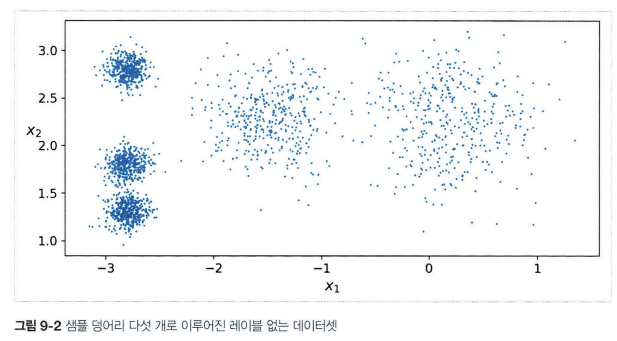

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
#데이터셋 생성
from sklearn.datasets import make_blobs
import numpy as np


blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [18]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [19]:
y_pred

array([4, 2, 1, ..., 0, 1, 2], dtype=int32)

In [20]:
y_pred is kmeans.labels_

True

In [21]:
#이 알고리즘이 찾은 센트로이드 확인
kmeans.cluster_centers_

array([[-2.79290307,  2.79641063],
       [ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [22]:
#새로운 샘플에 가장 가까운 센트로이드의 클러스터 할당
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 0, 0], dtype=int32)

클러스터의 결정 경계를 그려보면 보로노이 다이어그램을 얻을 수 있음

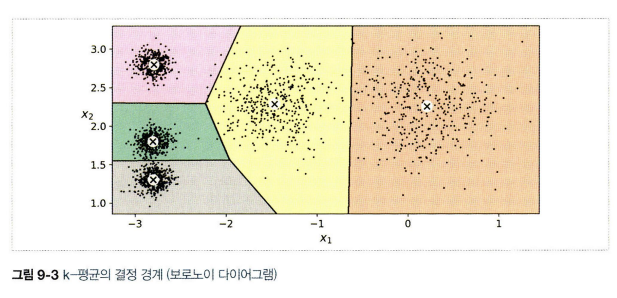

In [23]:
#transform() : 샘플과 센트로이드 사이의 거리 반환
kmeans.transform(X_new)

array([[2.9042344 , 0.32995317, 2.81093633, 1.49439034, 2.88633901],
       [5.84739223, 2.80290755, 5.80730058, 4.4759332 , 5.84236351],
       [0.29040966, 3.29399768, 1.21475352, 1.69136631, 1.71086031],
       [0.36159148, 3.21806371, 0.72581411, 1.54808703, 1.21567622]])

k-평균 알고리즘

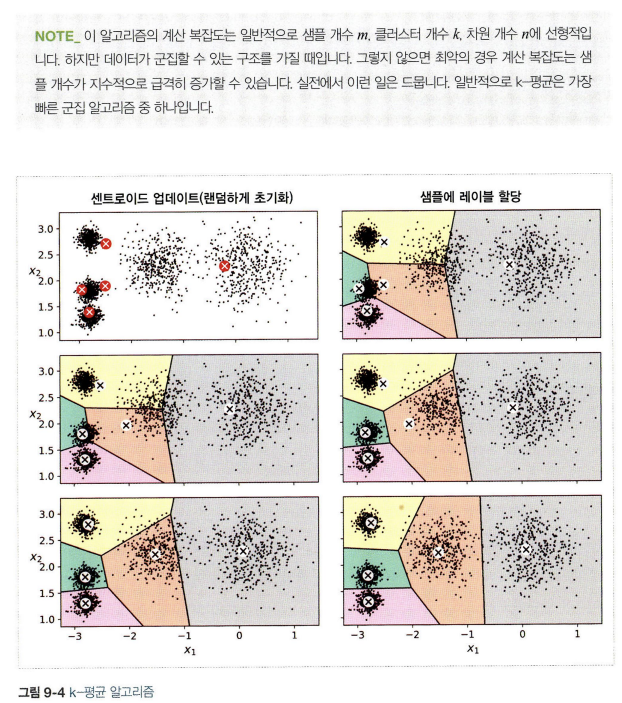

이 알고리즘이 수렴하는 것이 보장되지만 적절한 솔루션으로 수렴하지 못할 수 있음

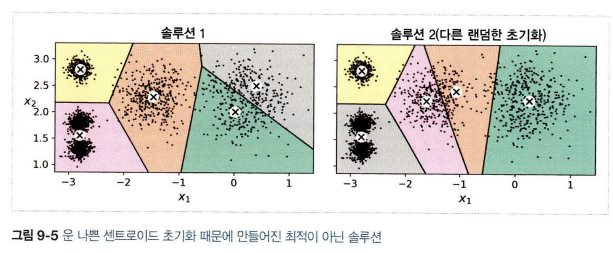

센트로이드 초기화 방법

In [24]:
#1. init 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고 n_init을 1로 설정
good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [26]:
#이너셔
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

In [27]:
kmeans.score(X)

-211.59853725816836

[k-평균++ 초기화 알고리즘]
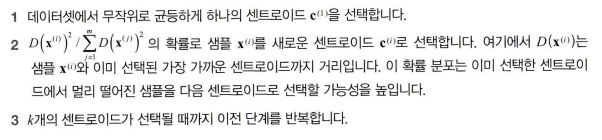

k-평균 속도 개선과 미니배치 k-평균

In [13]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

미니배치 k-평균이 일반 k-평균보다 훨씬 빠르고 k가 증가함에 따라 더 커지는 것을 확인할 수 있음

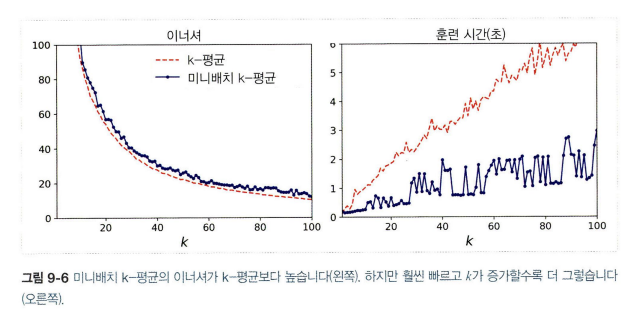

최적의 클러스터 개수 찾기

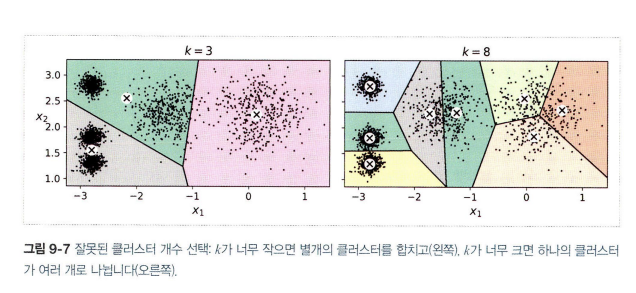

무조건 작은 이너셔를 가진 모델을 선택하는 것은 아님

이너셔는 k가 증가함에 따라 점점 작아지므로 k를 선택할 떄 좋은 성능 지표가 아님.

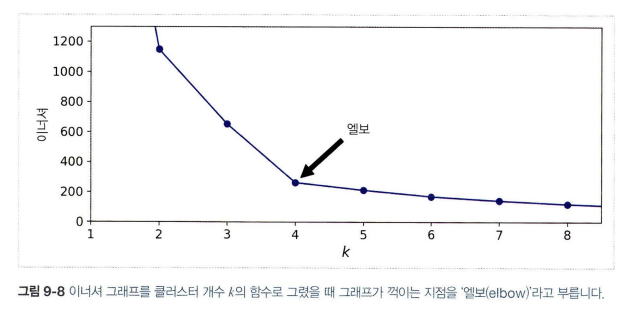

이너셔는 k가 4까지 증가할 때 빠르게 줄어듦. 하지만 k가 계속 증가하면 이너셔는 훨씬 느리게 감소함. k=4 지점이 엘보이고, k에 대한 정답을 모른다면 4는 좋은 선택일 것임

실루엣 점수 : 모든 샘플에 대한 실루엣 계수의 평균

실루엣 계수 : (b-a)/max(a,b)

a : 동일한 클러스터에 있는 다른 샘플까지 평균 거리

b : 가장 가까운 클러스터까지 평균 거리

실루엣 계수의 범위 : -1~1. 1에 가까우면 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와는 떨어져있다는 뜻. 실루엣 계수가 0에 가까우면 클러스터 경계에 위치한다는 의미이고, -1에 가까우면 샘플이 잘못된 클러스터에 할당되었다는 의미

In [28]:
#실루엣 점수 계산
from sklearn.metrics import silhouette_score
silhouette_score(X,kmeans.labels_)

0.655517642572828

실루엣 다이어그램 : 모든 샘플의 실루엣 계수를 할당된 클러스터와 계숫값으로 정렬하여 그리면 더 많은 정보가 있는 그래프를 얻을 수 있음

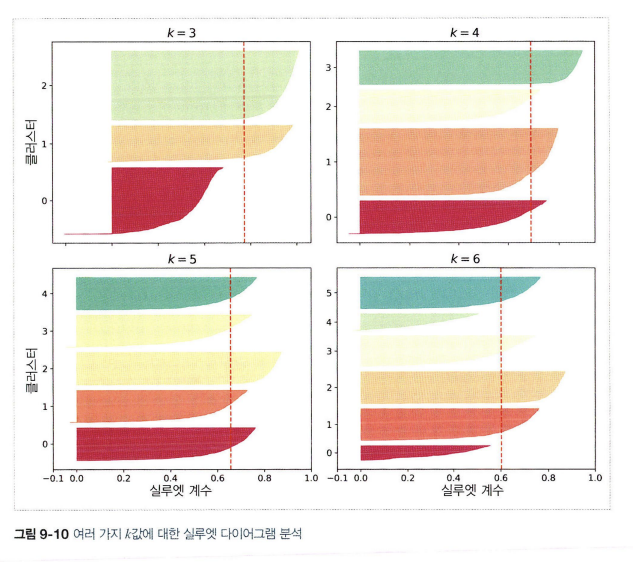

###9.1.2. k-평균의 한계

* 최적이 아닌 솔루션을 피하려면 알고리즘을 여러번 실행해야 함
* 클러스터 개수를 지정해야 함
* 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐경우 잘 작동하지 ㅇ낳음

###9.1.3. 군집을 사용한 이미지 분할

* 이미지 분할 : 이미지를 세그먼트 여러 개로 분할하는 작업
* 시맨틱 분할 : 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당됨
* 색상 분할 : 동일한 색상을 가진 픽셀을 같은 세그먼트에 할당함

In [29]:
import os
import urllib.request

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7c77acf2fa60>)

In [30]:
#이미지 읽기
from matplotlib.image import imread
image = imread(os.path.join("images","unsupervised_learning","ladybug.png"))
image.shape

(533, 800, 3)

In [31]:
#긴 리스로 변환한 다음 k-평균을 이용해 이 색상을 클러스터로 모음
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

###9.1.4. 군집을 사용한 전처리

차원 축소에 효과적인 방법임. 특히 지도 학습 알고리즘을 적용하기 전에 전처리 단계로 사용할 수 있음

In [32]:
#데이터셋 불러오기
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [33]:
#훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_digits,y_digits)

In [34]:
#로지스틱 회귀 모델을 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [35]:
#정확도 평가
log_reg.score(X_test,y_test)

0.9511111111111111

In [36]:
#k-평균을 전처리 단계로 사용해 정확도가 좋아지는지 확인
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans",KMeans(n_clusters=50)),
    ("log_reg",LogisticRegression())
])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

cf) 숫자가 10개이므로 클러스터 개수를 10개로 지정할 수 있음. 하지만 숫자를 쓴 방식이 저마다 다르기 때문에 50처럼 클러스터 개수를 크게하는 것이 좋음

In [37]:
#분류 파이프라인 평가
pipeline.score(X_test,y_test)

0.9533333333333334

In [38]:
#GridSearchCV를 사용해 최적의 클러스터 개수 찾기
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train,y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   1.7s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=3; total time=   2.4s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=4; total time=   1.5s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.8s
[CV] END ...............................kmeans__n_clusters=5; total time=   1.0s
[CV] END ...............................kmeans_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [39]:
#최적의 k값 확인
grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [40]:
#파이프라인 성능 확인
grid_clf.score(X_test,y_test)

0.9577777777777777

###9.1.5. 군집을 사용한 준지도 학습

In [41]:
#숫자 데이터셋에서 레이블된 50개 샘플에 로지스틱 회귀 모델 훈련
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression()

In [42]:
#모델 성능 확인
log_reg.score(X_test,y_test)

0.86

대표 이미지 : 훈련 세트를 50개의 클러스터로 모으고 각 클러스터에서 가장 가까운 이미지를 찾음

In [43]:
k =50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

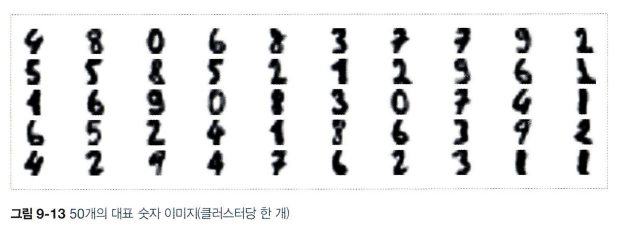

In [44]:
y_train[representative_digit_idx]

array([2, 9, 0, 9, 4, 7, 8, 5, 3, 6, 7, 0, 1, 4, 6, 2, 1, 3, 1, 3, 5, 8,
       9, 0, 7, 5, 8, 6, 4, 4, 4, 6, 2, 1, 2, 2, 9, 1, 9, 2, 8, 8, 5, 7,
       8, 6, 5, 2, 1, 7])

In [45]:
#수동 레이블 할당
y_representative_digits = np.array([3, 1, 0, 6, 4, 5, 7, 8, 9, 1, 2, 5, 9, 6, 6, 2, 8, 4, 7, 0, 1, 5,
       2, 4, 3, 7, 6, 9, 8, 3, 9, 3, 3, 6, 4, 1, 1, 8, 7, 8, 2, 4, 9, 0,
       2, 1, 2, 5, 7, 5])

In [46]:
#성능 확인
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.1

레이블 전파 : 레이블을 동일한 클러스터에 있는 모든 샘플로 전파

In [47]:
#레이블 전파
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [48]:
#모델 훈련 후 성능 확인
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.09555555555555556

성능이 어느정도 올랐지만 놀라운 정도는 아님

문제 : 각 대표 샘플의 레이블을 동일한 클러스터의 모든 샘플에 전파한 것

In [49]:
#센트로이드와 가까운 샘플의 20%에만 레이블을 전파
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [50]:
#모델 훈련
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.08444444444444445

레이블이 있는 전체 데이터셋에서 훈련한 로지스틱 회귀 성능에 매우 가까움

In [51]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.0859106529209622

[능동 학습]

가장 널리 사용되는 것 : 불확실성 샘플링
1. 지금까지 수집한 레이블된 샘플에서 모델 훈련. 이 모델을 사용해 레이블되지 않은 모든 샘플에 대한 예측을 만듦
2. 모델이 가장 불확실하게 예측한 샘플을 전문가에게 보내 레이블을 붙임
3. 레이블을 부여하는 노력만큼의 성능이 향상되지 않을 때까지 반복함

###9.1.6. DBSCAN

작동 방식

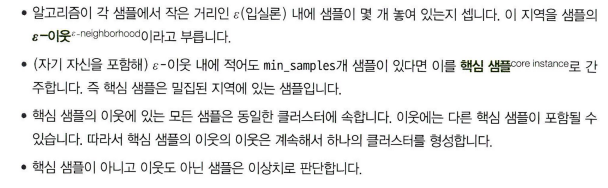

In [52]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y=make_moons(n_samples=1000, noise=0.05)
dbscan=DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [53]:
#모든 샘플의 레이블은 labels_에 저장되어있음
dbscan.labels_

array([ 0,  1,  2,  3,  4,  2,  2,  5,  6,  5,  1,  2,  1,  6, -1,  0,  1,
        6,  1,  2,  3,  3,  1,  7,  5,  5,  4,  1,  1, -1,  3,  0,  5,  1,
        0,  5,  1,  1,  7,  7,  1, -1,  0, -1,  7, -1,  5,  7,  8, -1,  3,
        7,  0,  2,  9,  1,  9,  6,  1,  5,  9, 10,  2, -1,  0,  5, -1,  2,
        0,  1,  5,  1,  1,  5, -1,  9, 10,  3,  2,  8,  7,  3,  2,  1,  5,
        7, -1,  7,  0,  2,  1,  1,  9,  6,  1,  1,  9,  7, -1,  5,  2,  8,
        0,  0,  1,  5,  1,  9,  5,  5,  1,  9,  2, -1,  0,  7,  2,  2,  2,
        0,  1,  2, -1,  0,  5,  7,  0, 10,  8,  2,  7,  1, 11,  2,  1,  5,
        2,  7, -1,  1,  1,  9,  1,  5,  1,  5,  1,  1,  1,  5,  2,  1,  1,
        9,  8,  5, -1, 10, -1,  2,  2,  5,  2,  5,  2,  2,  9,  1,  1,  9,
        1,  1,  8,  3,  2,  4, -1,  2,  1,  5,  5,  5,  2,  1,  2,  2,  6,
        1,  2,  2,  0,  2, -1,  0,  0,  1,  1,  5,  1,  3,  8,  0,  1,  9,
        1,  2,  2,  1,  9,  5,  2,  2,  5,  2,  2,  2,  7,  1,  1,  2,  1,
        6,  6,  5, -1,  5

일부 샘플의 클러스터 인덱스는 -1인데, 이는 알고리즘이 이 샘플을 이상치로 판단했다는 의미

In [54]:
len(dbscan.core_sample_indices_)

755

In [55]:
# 핵심 샘플의 인덱스
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   7,   8,  10,  11,  12,  13,  15,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  30,  31,
        32,  34,  35,  36,  37,  38,  40,  42,  44,  47,  48,  50,  51,
        52,  53,  55,  56,  57,  58,  59,  60,  62,  65,  68,  70,  71,
        72,  73,  75,  77,  78,  79,  80,  81,  82,  83,  84,  85,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97, 100, 102, 103,
       104, 105, 107, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119,
       120, 121, 123, 124, 125, 127, 130, 131, 132, 133, 134, 135, 136,
       137, 139, 140, 141, 142, 144, 145, 146, 147, 148, 151, 152, 153,
       154, 155, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       171, 173, 174, 175, 177, 178, 179, 182, 183, 184, 185, 186, 187,
       188, 189, 191, 193, 195, 196, 197, 198, 199, 201, 203, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 223, 225, 226, 227, 228, 229, 230, 232, 233, 234, 23

In [56]:
dbscan.components_

array([[ 0.07394844,  0.10392376],
       [ 1.33858367, -0.35769407],
       [ 0.57570692,  0.78736038],
       ...,
       [ 0.04786216,  0.40253932],
       [ 0.14413933,  0.11846152],
       [ 1.8049536 , -0.03260393]])

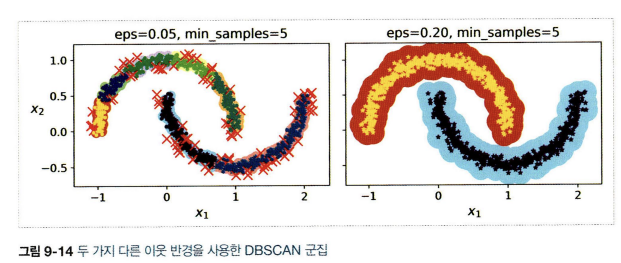

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [58]:
X_new=np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2,1]])
knn.predict(X_new)

array([6, 0, 3, 5])

In [59]:
y_dist, y_pred_idx=knn.kneighbors(X_new, n_neighbors=1)
y_pred=dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist>0.2]=-1
y_pred.ravel()

array([-1,  0,  3, -1])

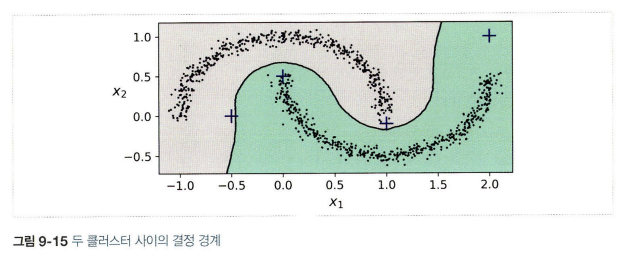

DBSCAN은 매우 간단하지만 강력한 알고리즘임.

클러스터의 모양과 개수에 상관없이 감지할 수 있는 능력이 있음.

이상치에 안정적이고 하이퍼파라미터가 두개뿐임

###9.1.7. 다른 군집 알고리즘

1. 병합 군집
2. BIRCH
3. 평균-이동
4. 유사도 전파
5. 스펙트럼 군집

##9.2. 가우시안 혼합

가우시안 혼합 모델 : 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델임

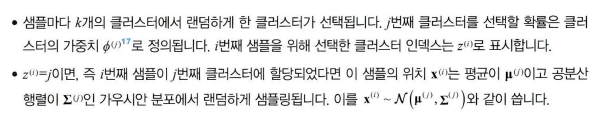

이 생성 과정은 그래프 모형으로 나타낼 수 있음

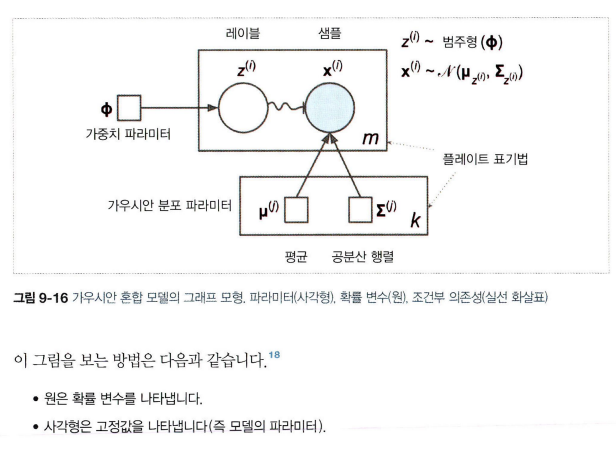

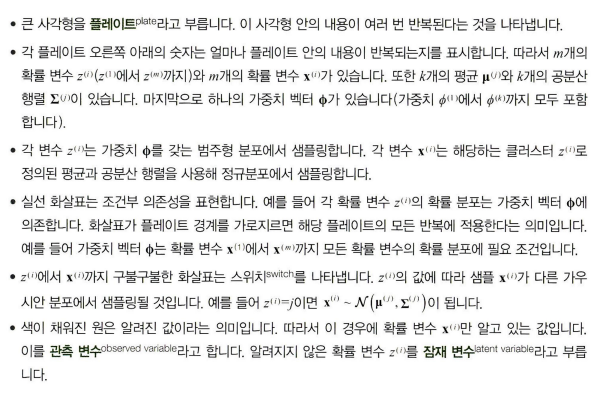

In [60]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

알고리즘이 추정한 파라미터 확인

In [61]:
gm.weights_

array([0.57951547, 0.20312117, 0.21736335])

In [62]:
gm.means_

array([[ 0.51868096,  0.23223134],
       [ 1.74725283, -0.0626098 ],
       [-0.70711848,  0.58622107]])

In [63]:
gm.covariances_

array([[[ 0.16294112, -0.09170818],
        [-0.09170818,  0.28322458]],

       [[ 0.05155359,  0.05984538],
        [ 0.05984538,  0.08469237]],

       [[ 0.06815812,  0.07158866],
        [ 0.07158866,  0.09292307]]])

In [64]:
gm.converged_

True

In [65]:
gm.n_iter_

19

In [66]:
gm.predict(X)

array([0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2,
       2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 1, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2,
       1, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1,

In [67]:
gm.predict_proba(X)

array([[1.00000000e+000, 3.46341030e-075, 9.85459595e-023],
       [4.22955466e-001, 5.77044534e-001, 2.50521130e-130],
       [1.00000000e+000, 1.82041062e-075, 2.06695861e-021],
       ...,
       [1.00000000e+000, 5.50932278e-097, 1.34144048e-013],
       [1.00000000e+000, 2.29115435e-070, 3.84603868e-025],
       [1.75593549e-003, 9.98244065e-001, 8.39782697e-151]])

In [68]:
X_new, y_new = gm.sample(6)
X_new

array([[ 0.35069517, -0.1645142 ],
       [ 0.04652443,  0.68059876],
       [ 0.91902302,  0.51460023],
       [ 0.48522285,  0.49385297],
       [-0.39711196,  0.9709224 ],
       [-0.76113825,  0.54171032]])

In [69]:
y_new

array([0, 0, 0, 0, 2, 2])

In [70]:
#확률 밀도 함수의 로그 예측
gm.score_samples(X)

array([-1.66129832e+00, -1.98287168e+00, -1.49931351e+00, -1.33423192e+00,
       -5.13588870e-01, -1.99917619e+00, -1.45061350e+00, -7.90289570e-02,
       -7.57959443e-01, -1.29401348e+00, -2.24649433e+00, -1.75216213e+00,
       -9.98076582e-01, -6.95712984e-01, -3.37117630e-01, -1.66783111e+00,
       -2.21489035e+00, -8.02441580e-01, -1.82528633e+00, -1.51010960e+00,
       -1.39183478e+00, -1.43345919e+00, -1.83383736e+00, -3.88663659e-01,
        5.82199879e-02, -1.82702752e-01, -6.54919757e-01, -1.82341626e+00,
       -1.37760028e+00, -5.83313832e-01, -1.42153582e+00, -1.45927575e+00,
       -3.16538269e-02, -1.70159258e+00, -1.68221906e+00, -2.44754421e+00,
       -1.47225226e+00, -2.24225890e+00, -3.68732445e-01, -1.15607586e+00,
       -1.70422913e+00, -2.20021122e+00, -1.54215102e+00, -1.32202657e+00,
       -7.41992691e-01, -1.58815954e+00,  2.89077396e-02, -1.34564764e+00,
       -1.77420850e+00, -1.64695208e+00, -1.61244728e+00, -1.04380841e+00,
       -1.68234469e+00, -

###9.2.1. 가우시안 혼합을 사용한 이상치 탐지

이상치 탐지 : 보통과 많이 다른 샘플을 감지하는 작업

In [71]:
#4%를 밀도 임곗값으로 사용하여 이상치 구분
densities=gm.score_samples(X)
density_threshold=np.percentile(densities, 4)
anomalies=X[densities < density_threshold]

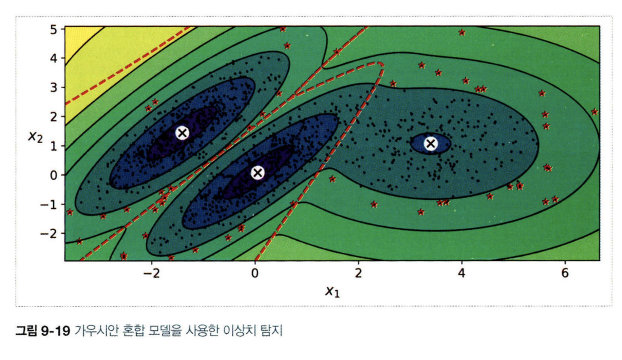

###9.2.2. 클러스터 개수 선택하기

실루엣 점수 등은 클러스터가 타원형이거나 크기가 다를 때 안정적이지 않음 -> BIC와 AIC와 같은 이론적 정보 기준을 최소화하는 모델을 찾음

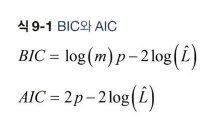

In [72]:
#BIC 계산
gm.bic(X)

2787.2679309070677

In [73]:
#AIC 계산
gm.aic(X)

2703.8360911643713

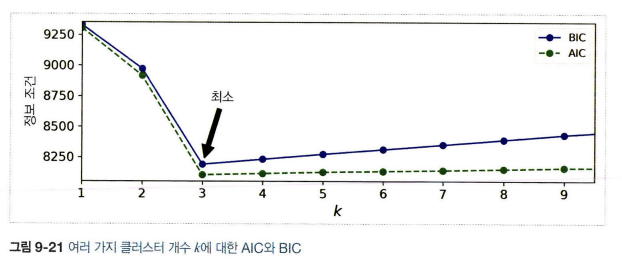

###9.2.3. 베이즈 가우시안 혼합 모델

In [74]:
#클러스터 개수를 10으로 설정하고 결과 확인
from sklearn.mixture import BayesianGaussianMixture
bgm=BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.16, 0.19, 0.1 , 0.13, 0.13, 0.15, 0.  , 0.  , 0.13, 0.  ])

알고리즘이 자동으로 3개의 클러스터가 필요하다는 것을 감지함

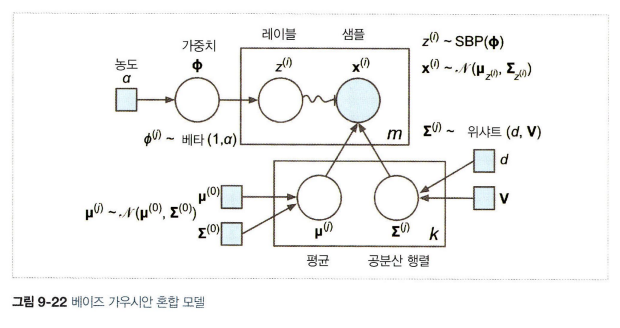

베이즈 정리 : 데이터 X를 관측하고 난 후 잠재 변수에 대한 확률 분포를 업데이트하는 방법을 설명함. 이는 X가 주어졌을 때 z의 조건부 확률인 사후 확률 분포 p(z|X)를 계산함

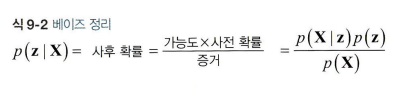

###9.2.4. 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘

1. PCA
2. Fast-MCD
3. 아이솔레이션 포레스트
4. LOF
5. one-class SVM